### Question 1

In [5]:
from scipy.optimize import bisect, newton, minimize_scalar, minimize
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the functions
def f1(x):
    return np.sin(2 * np.pi * x) - 2 * x

def f2(x):
    return np.sin(2 * np.pi * x) - x

def f3(x):
    return np.sin(2 * np.pi * x) - 0.5 * x

# Define the derivative for Newton's method
def df1(x):
    return 2 * np.pi * np.cos(2 * np.pi * x) - 2

def df2(x):
    return 2 * np.pi * np.cos(2 * np.pi * x) - 1

def df3(x):
    return 2 * np.pi * np.cos(2 * np.pi * x) - 0.5

# Define the secant method
def secant_method(func, x0, x1, max_iter=100, tol=1e-6):
    for _ in range(max_iter):
        if abs(func(x1)) < tol:
            return x1
        x0, x1 = x1, x1 - func(x1) * (x1 - x0) / (func(x1) - func(x0))
    return x1

# Define fixed-point iteration
def fixed_point_iteration(func, x0, max_iter=100, tol=1e-6):
    for _ in range(max_iter):
        x1 = func(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

# Define a function to find solutions using different methods
def find_roots(func, dfunc, range_x):
    roots = {"bisection": [], "newton": [], "secant": [], "fixed_point": []}
    for x0 in np.linspace(range_x[0], range_x[1], 100):
        try:
            root_bisect = bisect(func, range_x[0], range_x[1], xtol=1e-6)
            if root_bisect not in roots["bisection"]:
                roots["bisection"].append(root_bisect)
        except ValueError:
            pass

        try:
            root_newton = newton(func, x0, fprime=dfunc, tol=1e-6)
            if root_newton not in roots["newton"]:
                roots["newton"].append(root_newton)
        except RuntimeError:
            pass

        try:
            root_secant = secant_method(func, x0, x0 + 0.1, tol=1e-6)
            if root_secant not in roots["secant"]:
                roots["secant"].append(root_secant)
        except RuntimeError:
            pass

        try:
            root_fixed_point = fixed_point_iteration(lambda x: x - func(x), x0, tol=1e-6)
            if root_fixed_point not in roots["fixed_point"]:
                roots["fixed_point"].append(root_fixed_point)
        except RuntimeError:
            pass

    return roots

# Find roots for each function
range_x = [-2, 2]
roots_f1 = find_roots(f1, df1, range_x)
roots_f2 = find_roots(f2, df2, range_x)
roots_f3 = find_roots(f3, df3, range_x)

# roots_f1, roots_f2, roots_f3



### Question 2

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 49
         Gradient evaluations: 112
         Hessian evaluations: 0


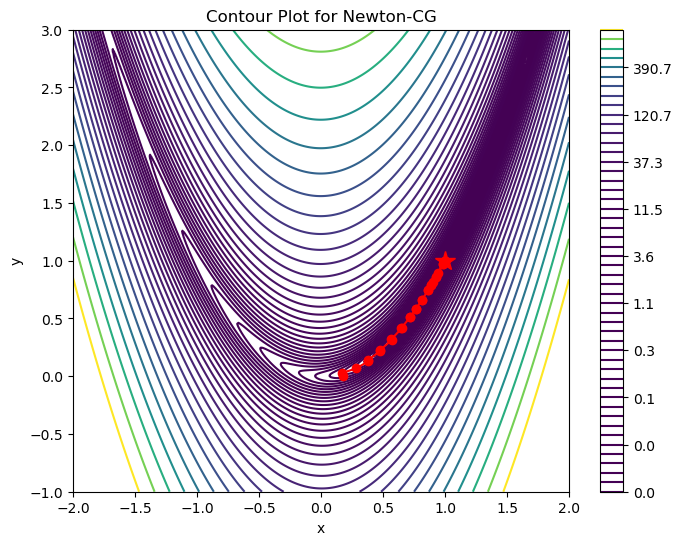

In [34]:
# Newton-CG Method Optimization

# Define the objective function
def objective(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Define the Jacobian (gradient) of the objective function
def jacobian(x):
    df_dx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1])

# Callback function to capture the trajectory
trajectory = []

def capture_trajectory(x):
    trajectory.append(x)

# Newton-CG Method Optimization with Jacobian
result = minimize(objective, [0, 0], method='Newton-CG', jac=jacobian, callback=capture_trajectory, options={'disp': True})


trajectory = np.array(trajectory)

# Plot contours
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = objective([X, Y])


plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 50), cmap='viridis')
# Plot the trajectory of optimization
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.colorbar(cp)
plt.plot(result.x[0], result.x[1], 'r*', markersize=15)  # Replace 'result' with the result of each method
plt.title('Contour Plot for Newton-CG')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.761058131084857e-15
       x: [ 1.000e+00  1.000e+00]
     nit: 31
     jac: [ 2.750e-05 -1.378e-05]
    nfev: 49
    njev: 112
    nhev: 0

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 146


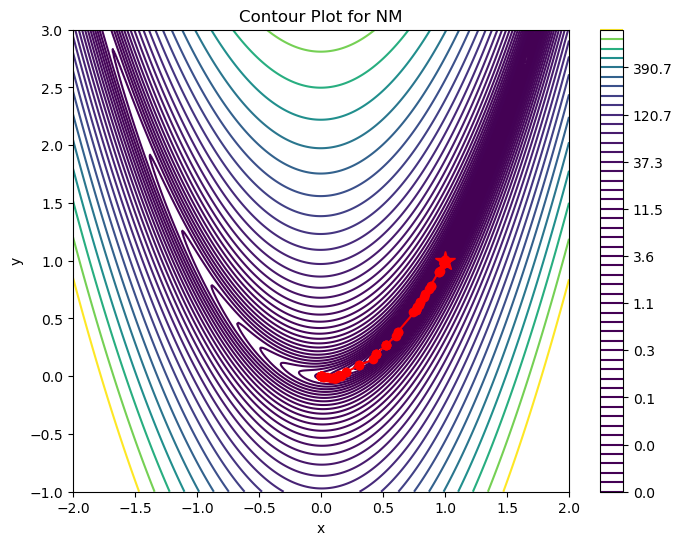

In [32]:
# Nelder Mead Method
trajectory_nelder_mead = []

def capture_trajectory_nelder_mead(x):
    trajectory_nelder_mead.append(x)

# Nelder-Mead Method Optimization
result_nelder_mead = minimize(objective_function, [0, 0], method='Nelder-Mead', callback=capture_trajectory_nelder_mead)

# Convert the trajectory list to a NumPy array for Nelder-Mead
trajectory_nelder_mead = np.array(trajectory_nelder_mead)


result_nelder_mead = minimize(objective_function, [0, 0], method='Nelder-Mead',options={'disp': True})


# Mark the optimal solution
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 50), cmap='viridis')
# Plot the trajectory of optimization
plt.plot(trajectory_nelder_mead[:, 0], trajectory_nelder_mead[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.colorbar(cp)
plt.plot(result.x[0], result.x[1], 'r*', markersize=15)  # Replace 'result' with the result of each method
plt.title('Contour Plot for NM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [20]:
result_nelder_mead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.6861769151759075e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 79
          nfev: 146
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  9.999e-01],
                       [ 1.000e+00,  1.000e+00]]), array([ 3.686e-10,  1.636e-09,  2.022e-09]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 165
         Gradient evaluations: 55


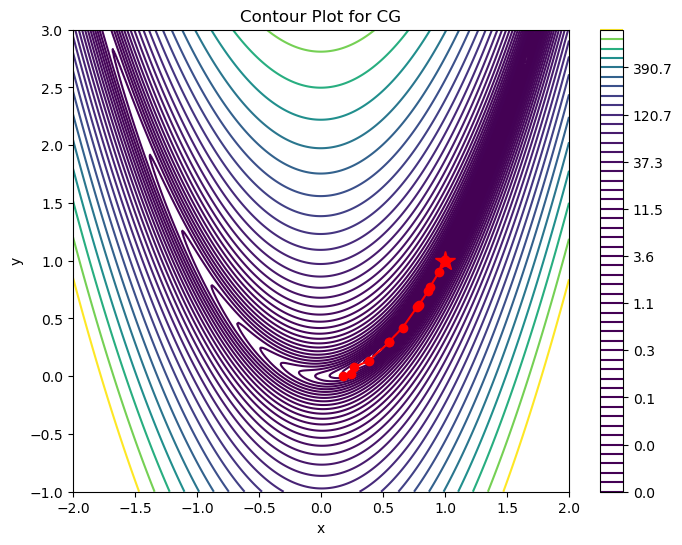

In [27]:
# CG Method
trajectory = []

def capture_trajectory(x):
    trajectory.append(x)
    
result = minimize(objective, [0, 0], method='CG', callback=capture_trajectory, options={'disp': True})


trajectory = np.array(trajectory)


x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 50), cmap='viridis')
# Plot the trajectory of optimization
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.colorbar(cp)
plt.plot(result.x[0], result.x[1], 'r*', markersize=15)  # Replace 'result' with the result of each method
plt.title('Contour Plot for CG')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 72
         Gradient evaluations: 24


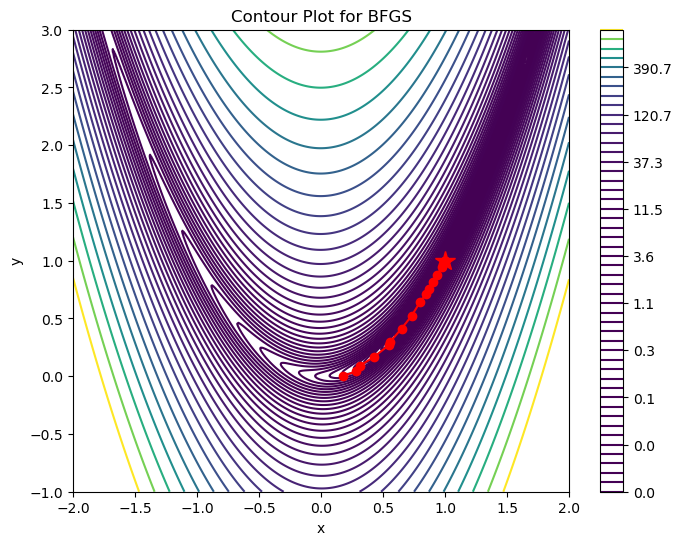

In [28]:
# BFGS Method
trajectory = []

def capture_trajectory(x):
    trajectory.append(x)
    
result = minimize(objective, [0, 0], method='BFGS', callback=capture_trajectory, options={'disp': True})


trajectory = np.array(trajectory)


x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 50), cmap='viridis')
# Plot the trajectory of optimization
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.colorbar(cp)
plt.plot(result.x[0], result.x[1], 'r*', markersize=15)  # Replace 'result' with the result of each method
plt.title('Contour Plot for BFGS')
plt.xlabel('x')
plt.ylabel('y')
plt.show()